# Machine Learning Model

- Pada Notebook ini akan dibangun Supervised Machine Learning menggunakan metode Logisitic Regression, Random Forest, dan K-Nearest Neighbors.
- Class label pada dataset tidak seimbang, label Not Churn : 5163, label Chrun : 1869. 
- Model 1 akan menggunakan dataset asli tanpa menyeimbangkan class terlebih dahulu, model 2 akan menggunakan dataset yang diseimbangkan terlebih dahulu dengan metode Under Sampling, model 3 akan menggunakan dataset yang diseimbangkan dengan metode Over Sampling.
- Feature Monthly Charges dan Total Charges tidak akan digunakan sebagai variable prediktor dengan pertimbangan sebagai berikut :
    - 2 Feature tersebut merupakan feature dependent, hal ini sudah dibuktikan pada notebook EDA sebelumnya
    - Dalam membuat model Machine Learning, tidak ada keharusan untuk membuang feature yang dependent, namun dalam membuat model interface yang bisa digunakan oleh user, 2 feature ini akan menyulitkan user untuk melakukan input nilainya karena user tidak benar-benar tahu nilainya. Untuk mendapatkan nilai Monthly Charges dan Total Charges setiap perusahaan pasti sudah memiliki formula/perhitungan untuk menentukan harga, jika demikian kita bisa menggunakan feature ini sebagai prediktor, tapi pada kasus ini kita tidak memiliki formula tersebut.

- Sebelum saya benar benar membuang feature tersebut, saya akan melihat perbandingan model yang menggunakan 2 feature tersebut dan yang tidak menggunakan 2 feature tersebut.

## Load Package and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score,RandomizedSearchCV, GridSearchCV
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings("ignore")

In [58]:
pd.set_option("display.max_columns", 22)
telcom = pd.read_csv('telcom_clean1.csv')
telcom.head()

,customerID,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,0,0,1,0,1,0,0,1,...,0,0,1,0,0,1,0,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0.064303,-0.260878,-0.173740
2,3668-QPYBK,0,0,0,1,1,1,0,1,1,0,...,0,0,1,0,0,1,0,0,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,0,0,0,0,0,0,0,1,0,1,...,0,1,1,0,0,1,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,1,1,1,1,0,1,0,...,0,0,1,0,0,1,0,0,-1.239504,0.196178,-0.940457


In [59]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 43 columns):
customerID                                 7032 non-null object
SeniorCitizen                              7032 non-null int64
Partner                                    7032 non-null int64
Dependents                                 7032 non-null int64
PhoneService                               7032 non-null int64
PaperlessBilling                           7032 non-null int64
Churn                                      7032 non-null int64
gender_Female                              7032 non-null int64
gender_Male                                7032 non-null int64
MultipleLines_No                           7032 non-null int64
MultipleLines_No phone service             7032 non-null int64
MultipleLines_Yes                          7032 non-null int64
InternetService_DSL                        7032 non-null int64
InternetService_Fiber optic                7032 non-null int64
InternetSe

# 1. Model 1 (Imbalance Dataset)

- Pada Model ini saya akan menggunakan semua feature sebagai variable prediktor
- Untuk melakukan prediksi, saya akan menggunakan model klasifikasi Logistic Regression, Random Forest, dan K-Nearest Neighbors dengan parameter default.

### Spliting Data

In [60]:
## train test split
pd.set_option("display.max_columns", 33)
#splitting train and test data 
feature    = telcom.drop(columns=['customerID','Churn'])
target = telcom['Churn']
train_X,test_X,train_Y,test_Y = train_test_split(feature,target,test_size = .25,random_state=123)
feature.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'gender_Female', 'gender_Male', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', '

### Deklarasi Model

Deklarasi model menggunakan parameter default

In [84]:
### Logistic Regression
lr = LogisticRegression()
lr.fit(train_X,train_Y)

### Random Forest
rf = RandomForestClassifier()
rf.fit(train_X,train_Y)

### KNN
knn = KNeighborsClassifier()
knn.fit(train_X,train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Evaluation

__1. Confusion Matrix__

Pada tahap ini saya akan melihat hasil klasifikasi dalam bentuk Confusion matrix, Confusion matrix adalah tabel yang terdiri dari data aktual dan data prediksi, tabel ini digunakan dengan tujuan untuk
mengukur kinerja suatu model klasifikasi. Berikut ini merupakan tabel klasifikasi churning customer

-|pred "No Churn"|pred "Churn"
---|---|---
__aktual "No Churn"__|__TN__|__FP__
__aktual "Churn"__|__FN__|__TP__

- True Negative (TN) adalah jumlah pelanggan dengan nilai aktual non churn, dan diprediksi non churn.
- False Positive (FP) adalah jumlah pelanggan dengan nilai aktual non churn, tapi diprediksi churn.
- True Positive (TP) adalah jumlah pelanggan dengan nilai aktual churn, dan diprediksi churn.
- False Negative (FN) adalah jumlah pelanggan dengan nilai aktual churn, tapi diprediksi non churn.

__Noted__ : Pada model ini, No Churn dilabeli dengan angka 0, sedangkan Churn dilabeli dengan angka 1

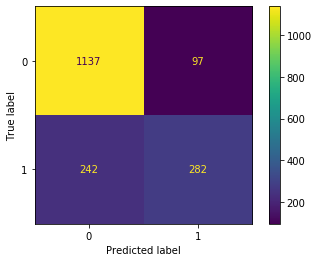

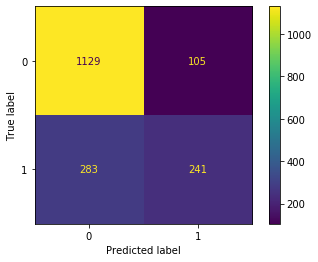

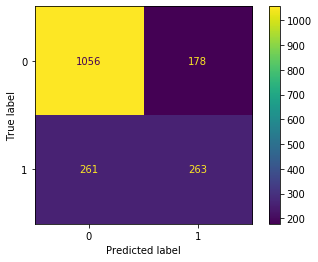

In [85]:
plot_confusion_matrix(lr,test_X,test_Y,values_format='0.0f')
plot_confusion_matrix(rf,test_X,test_Y,values_format='0.0f')
plot_confusion_matrix(knn,test_X,test_Y,values_format='0.0f')

__2. Evaluation Matrix__

Untuk melakukan evaluasi bisa dilakukan dengan menghitung Precision, Recall, F1 Score, dan Accuracy

- _Precision_ dihitung untuk mengevaluasi seberapa baik ketepatan model dapat memprediksi suatu kelas.
Precision didapatkan dengan menghitung perbandingan antara jumlah data untuk satu kelas tertentu
yang diprediksi dengan benar dibagi jumlah total prediksi kelas tersebut.
$$\displaystyle Precision(1) = \frac {TP}{TP + FP}$$
$$\displaystyle Precision(0) = \frac {TN}{TN + FN}$$

- _Recall_ dihitung untuk mengevaluasi seberapa besar coverage suatu model dalam memprediksi suatu
kelas tertentu. Recall didapatkan dengan menghitung perbandingan antara jumlah data untuk satu kelas
tertentu yang diprediksi dengan benar dibagi jumlah total nilai aktual kelas tersebut. Recall positif disebut Sensitivity, untuk Recall Negatif disebut Specify.
    - _Sensitivity_ merupakan frekuensi relatif dari memprediksi suatu kejadian yang terjadi ketika kejadian tersebut memang terjadi
    - _Specify_ merupakan frekuensi relatif dari memprediksi suatu kejadian yang tidak terjadi ketika kejadian tersebut memang tidak terjadi
$$\displaystyle Recall(1)/Sensitivity = \frac {TP}{TP + FN}$$
$$\displaystyle Recall(0)/Specify = \frac {TN}{TN + FP}$$

- _F1 Score_ adalah perhitungan kombinasi antara _recall_ dan _precision_ , bisa dikatakan harmonic / rata-rata tertimbang antara _recall_ dan _precision_
$$\displaystyle F1 Score(1) = 2 \cdot \frac {Recall(1) \cdot Precision(1)}{Recall(1) + Precision(1)}$$

$$\displaystyle F1 Score(0) = 2 \cdot \frac {Recall(0) \cdot Precision(0)}{Recall(0) + Precision(0)}$$

- _Accuracy_ merupakan ukuran seberapa akurat model memprediksi data, dihitung berdasarkan total prediksi benar dibagi total semua prediksi
$$\displaystyle Accuracy = \frac {TP + TN}{TP + TN + FP + FN}$$

In [87]:
print('Logistic Regressin\n',classification_report(test_Y,lr.predict(test_X)))
print('\n\nRandom Forest\n',classification_report(test_Y,rf.predict(test_X)))
print('\n\nKNN\n',classification_report(test_Y,knn.predict(test_X)))

Logistic Regressin
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1234
           1       0.74      0.54      0.62       524

    accuracy                           0.81      1758
   macro avg       0.78      0.73      0.75      1758
weighted avg       0.80      0.81      0.80      1758



Random Forest
               precision    recall  f1-score   support

           0       0.80      0.91      0.85      1234
           1       0.70      0.46      0.55       524

    accuracy                           0.78      1758
   macro avg       0.75      0.69      0.70      1758
weighted avg       0.77      0.78      0.76      1758



KNN
               precision    recall  f1-score   support

           0       0.80      0.86      0.83      1234
           1       0.60      0.50      0.55       524

    accuracy                           0.75      1758
   macro avg       0.70      0.68      0.69      1758
weighted avg       0.74      0

__Noted__ : Dalam evaluasi model ini saya menggunakan data test imbalance, karena model ini dibangun untuk memeprediksi kemungkinan customer untuk churning (class label : 1), jadi saya mengguankan __F1 Score__ untuk class label : 1 sebagai acuan utama mengukur peforma model.

Dari data di atas, __Logistic Regression__ mempunyai F1 Score tertingi

__3. ROC and AUC__

- __ROC (Receiver Operating Characteristics)__ kurva tentang true positive rate (TPR) vs the false positive rate (FPR) sebagai fungsi threshold dari sebuah model untuk mengklasifikasikan kelas positif. 

$$\displaystyle TPR = \frac {TP}{TP+FN}$$

$$\displaystyle FPR = \frac {FP}{TN+FP}$$

- __AUC (Area Under the Curve)__ Matric untuk mengkalkulasi perfoma secara keseluruhan dari model klasifikasi berdasarkan area di bawah kurva ROC, luas maksimal AUC adalah 1, semakin tinggi AUC artinya model semakin baik

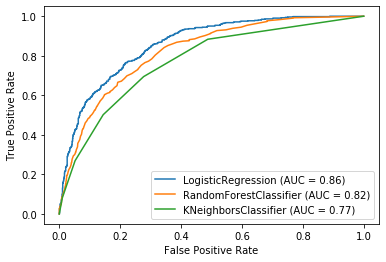

In [88]:
display = plot_roc_curve(lr,test_X,test_Y)
plot_roc_curve(rf,test_X,test_Y,ax=display.ax_)
plot_roc_curve(knn,test_X,test_Y,ax=display.ax_)

- Model __Logistic regression__ memiliki __F1 Score__ 0.62 dan __AUC__ 0.86, ini merupakan score tertinggi diantara model yang lain, selanjutnya saya akan melakukan Hyperparapeter Tuning untuk mendapatkan parameter terbaik dari setiap model.

### Hyperparameter Tuning 

Hyperparameter Tuning bertujuan untuk menentukan parameter terbaik dari setiap model sehingga peforma model bisa ditingkatkan, saya akan menggunakan ```GridSearchCV``` untuk melakukan parameter tuning. GridSearchCV memungkinkan untuk mengkombinasikan setiap parameter yang telah kita deklarasikan.

Pada proses hyper parameter ini saya mengunakan ```CrossValidation``` dengan 5 fold/lipatan, artinya data train (train_X) akan dibagi lagi menjadi 5 bagian, 4 bagian merupakan data train, dan 1 bagian merupakan data test, kemudian cara ini diulangi lagi sebanyak 5 kali dengan mengubah urutan bagian data test. 

In [65]:
def tuning(model,parameter,n_cv):
    random = GridSearchCV(model, parameter, cv = n_cv,scoring='f1')
    random.fit(train_X,train_Y)
    best_param = random.best_params_
    
    return best_param

__Parameter Tuning Logistic Regression__

In [21]:
# lr_tune = LogisticRegression()
# param_lr = {
#     'solver':['newton-cg','lbfgs','liblinear','sag','saga'], ##algoritma Logistic regression
#     'penalty':['none','l1','l2','elasticnet','none'], # regularisasi
#     'C':[100,10,1.0,0.1,0.01], #regulasi strength
# }

# param_best = tuning(lr_tune,param_lr,5)
# param_best

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [66]:
lr_tune = LogisticRegression(C = 100, penalty='l1',solver='liblinear')
lr_tune.fit(train_X,train_Y)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

__Parameter Tuning Random Forest__

In [25]:
# rf_tune = RandomForestClassifier()

# param_rf= {
#     'n_estimators': [10,50,100], ## jumlah tree
#     'criterion':['gini','entropy'], ## algoritma tree
#     'bootstrap':[False,True] ## baging or bootstraping
# }

# param_best = tuning(rf_tune,param_rf,5)
# param_best

{'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 100}

In [68]:
rf_tune = RandomForestClassifier(n_estimators = 100,criterion='entropy',bootstrap=True)
rf_tune.fit(train_X,train_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

__Parameter Tuning KNN__

In [16]:
# knn_tune = KNeighborsClassifier()

# param_knn = {
#         'n_neighbors' : list(range(50,100)), ## jumlah n neighbors
#         'weights':['uniform','distance'], ## one man one vote , lebih dekat lebih berbobot
#         'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], # struktur data
# }

# param_best = tuning(knn_tune,param_knn,5)
# param_best

In [69]:
knn_tune = KNeighborsClassifier(algorithm='auto',n_neighbors=64,weights='uniform')
knn_tune.fit(train_X,train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=64, p=2,
                     weights='uniform')

### Final Evaluation

Logistic Regression Default
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1234
           1       0.74      0.54      0.62       524

    accuracy                           0.81      1758
   macro avg       0.78      0.73      0.75      1758
weighted avg       0.80      0.81      0.80      1758



Logistic Regression Tuning
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1234
           1       0.74      0.54      0.63       524

    accuracy                           0.81      1758
   macro avg       0.78      0.73      0.75      1758
weighted avg       0.80      0.81      0.80      1758


Random Forest Default
               precision    recall  f1-score   support

           0       0.80      0.91      0.85      1234
           1       0.70      0.46      0.55       524

    accuracy                           0.78      1758
   macro avg       0.75      0.69      0.70  

Text(0.5, 1.0, 'ROC Curve After Tuning')

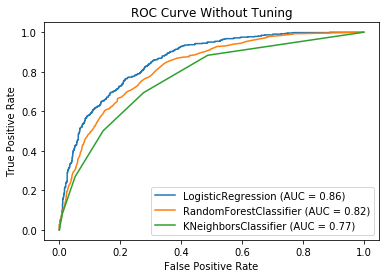

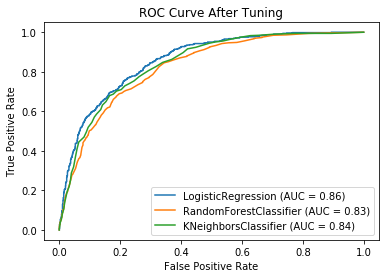

In [135]:
## Report
print('Logistic Regression Default\n',classification_report(test_Y,lr.predict(test_X)))
print('\n\nLogistic Regression Tuning\n',classification_report(test_Y,lr_tune.predict(test_X)))
print('========================================================================')
print('\nRandom Forest Default\n',classification_report(test_Y,rf.predict(test_X)))
print('\nRandom Forest Tuning\n',classification_report(test_Y,rf_tune.predict(test_X)))
print('========================================================================')
print('\nKNN Default\n',classification_report(test_Y,knn.predict(test_X)))
print('\nKNN Tuning\n',classification_report(test_Y,knn_tune.predict(test_X)))

## ROC_AUC
display = plot_roc_curve(lr,test_X,test_Y)
plot_roc_curve(rf,test_X,test_Y,ax=display.ax_)
plot_roc_curve(knn,test_X,test_Y,ax=display.ax_)
plt.title('ROC Curve Without Tuning')

disp = plot_roc_curve(lr_tune,test_X,test_Y)
plot_roc_curve(rf_tune,test_X,test_Y,ax=disp.ax_)
plot_roc_curve(knn_tune,test_X,test_Y,ax=disp.ax_)
plt.title('ROC Curve After Tuning')

- Seteleh dilakukan hyperparameter tuning, semua model mengalami peningkatan peforma, __Logistic Regression__ merupakan model terbaik dengan __F1 Score__ dan __AUC__ tertinggi

## Exclude Feature Monthly Charges dan Total Charges

Pada Model ini saya tidak akan menggunakan Monthly Charges dan Total Charges untuk memprediksi model.

### Spliting Data

In [78]:
#splitting train and test data 
train_X1 = train_X.drop(columns=['MonthlyCharges','TotalCharges'])
test_X1 = test_X.drop(columns=['MonthlyCharges','TotalCharges'])
train_Y1 = train_Y.copy()
test_Y1 = test_Y.copy()

### Deklarasi Model

Deklarasi model menggunakan parameter default

In [90]:
### Logistic Regression
lr1 = LogisticRegression()
lr1.fit(train_X1,train_Y1)

rf1 = RandomForestClassifier()
rf1.fit(train_X1,train_Y1)

knn1 = KNeighborsClassifier()
knn1.fit(train_X1,train_Y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Hyper Parameter Tuning

__Logistic Regression__

In [81]:
def tuning(model,parameter,n_cv):
    random = GridSearchCV(model, parameter, cv = n_cv,scoring='f1')
    random.fit(train_X1,train_Y1)
    best_param = random.best_params_
    
    return best_param

In [37]:
# lr1_tune = LogisticRegression()
# param_best = tuning(lr1_tune,param_lr,5)
# param_best 

# {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [82]:
lr1_tune = LogisticRegression(solver='newton-cg',penalty='l2',C=1)
lr1_tune.fit(train_X1,train_Y1)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

__Random Forest__

In [41]:
# rf1_tune = RandomForestClassifier()
# param_best = tuning(rf1_tune,param_rf,5)
# param_best

# {'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 100}

{'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 100}

In [92]:
rf1_tune = RandomForestClassifier(n_estimators = 10,criterion='gini',bootstrap=False)
rf1_tune.fit(train_X1,train_Y1)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

__KNN__

In [44]:
# knn1_tune = KNeighborsClassifier()
# param_best = tuning(knn1_tune,param_knn,5)
# param_best

# {'algorithm': 'auto', 'n_neighbors': 79, 'weights': 'uniform'}

{'algorithm': 'auto', 'n_neighbors': 79, 'weights': 'uniform'}

In [94]:
knn1_tune = KNeighborsClassifier(weights='distance',n_neighbors=50,algorithm='auto')
knn1_tune.fit(train_X1,train_Y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='distance')

### Evaluation

Logistic Regression Default
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1234
           1       0.74      0.54      0.63       524

    accuracy                           0.81      1758
   macro avg       0.78      0.73      0.75      1758
weighted avg       0.80      0.81      0.80      1758

Logistic Regression Tuning
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1234
           1       0.74      0.54      0.63       524

    accuracy                           0.81      1758
   macro avg       0.78      0.73      0.75      1758
weighted avg       0.80      0.81      0.80      1758



Random Forest Default
               precision    recall  f1-score   support

           0       0.79      0.90      0.84      1234
           1       0.66      0.43      0.52       524

    accuracy                           0.76      1758
   macro avg       0.72      0.67      0.68   

Text(0.5, 1.0, 'ROC After Tuning')

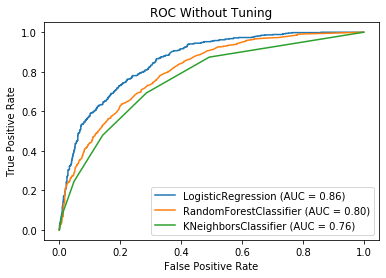

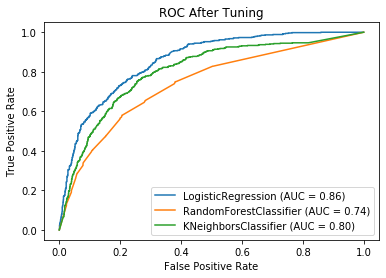

In [137]:
print('Logistic Regression Default\n',classification_report(test_Y1,lr1.predict(test_X1)))
print('Logistic Regression Tuning\n',classification_report(test_Y1,lr1_tune.predict(test_X1)))
print('==========================================================================')
print('\n\nRandom Forest Default\n',classification_report(test_Y1,rf1.predict(test_X1)))
print('\n\nRandom Forest Tuning\n',classification_report(test_Y1,rf1_tune.predict(test_X1)))
print('==========================================================================')
print('\n\nKNN Default\n',classification_report(test_Y1,knn1.predict(test_X1)))
print('\n\nKNN Tuning\n',classification_report(test_Y1,knn1_tune.predict(test_X1)))

## ROC_AUC
disp = plot_roc_curve(lr1,test_X1,test_Y)
plot_roc_curve(rf1,test_X1,test_Y1,ax=disp.ax_)
plot_roc_curve(knn1,test_X1,test_Y1,ax=disp.ax_)
plt.title('ROC Without Tuning')
disp = plot_roc_curve(lr1_tune,test_X1,test_Y1)
plot_roc_curve(rf1_tune,test_X1,test_Y1,ax=disp.ax_)
plot_roc_curve(knn1_tune,test_X1,test_Y1,ax=disp.ax_)
plt.title('ROC After Tuning')

In [97]:
# auc2_new = [0.86,0.65,0.75,0.80]
# report2_new = pd.DataFrame({'Model': ['Logistic Regression','Decision Tree','Random Forest','KNN'],
#                        'F1 Score': f1_new,
#                        'AUC': auc2_new})
# report2_new

In [27]:
# plt.figure(figsize=(16,5))
# plt.subplot(121)
# plt.plot(report2_new['Model'], report2_new['F1 Score'],'g-o',label='F1 Score')
# plt.xticks(rotation=45);plt.title('F1 Score')
# plt.grid(True)
# plt.legend()
# plt.subplot(122)
# plt.plot(report2_new['Model'], report2_new['AUC'],marker='o',label='AUC')
# plt.xticks(rotation=45);plt.title('AUC')
# plt.grid(True)
# plt.legend()
# plt.show()

Grafik di atas merupakan perbandingan model 1 yang menggunakan semua feature dan model 2 yang menghilangkan feature MonthlyCharges dan TotalCharges, menghilangkan 2 feature tersebut menurunkan accuracy dan nilai AUC model Random Forest. Meskipun demikian angka yang di dapat masih sangat baik, Saya akan menggunakan Random Forest Model 2 untuk kita deploy di user interface.

# 2. Model 2 (Under Sampling)

Dalam dataset ini __class 0__ : 5163, sedangkan __class 1__ : 1869, saya akan menggunakan ```NearMiss``` untuk menyeimbangkan class, teknik ini akan menghapus beberapa sample majority class yaitu __class 0__ sehingga jumlahnya sama dengan minority __class 1__ , ```NearMiss``` akan menghapus majority class yang memiliki jarak terdekat dari minority class.[source](https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/)

### Balancing Dataset 

In [28]:
telcom['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [30]:
X = telcom.drop(columns=['customerID','Churn','MonthlyCharges','TotalCharges'])
Y = telcom['Churn']

In [31]:
nm =  NearMiss()
X_res,Y_res=nm.fit_sample(X,Y)
telco = pd.concat([X_res,Y_res],axis=1)
telco['Churn'].value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

### Spliting Data

In [99]:
#splitting train and test data 
feature    = telco.drop(columns=['Churn'])
target = telco['Churn']
train_X2,test_X2,train_Y2,test_Y2 = train_test_split(feature,target,test_size = .25,random_state=123)

### Deklarasi Model

Deklarasi model menggunakan parameter default

In [100]:
### Logistic Regression
lr2 = LogisticRegression()
lr2.fit(train_X2,train_Y2)
### Random Forest
rf2 = RandomForestClassifier()
rf2.fit(train_X2,train_Y2)
### KNN
knn2 = KNeighborsClassifier()
knn2.fit(train_X2,train_Y2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Hyperparameter Tuning

__Parameter Tuning Logistic Regression__

In [36]:
def tuning(model,parameter,n_cv):
    random = GridSearchCV(model, parameter, cv = n_cv)
    random.fit(train_X2,train_Y2)
    best_param = random.best_params_
    
    return best_param

In [19]:
# lr2_tune = LogisticRegression()
# param_best = tuning(lr2_tune,param_lr,5)
# param_best

# {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

In [103]:
lr2_tune = LogisticRegression(C=10,penalty='l1',solver='liblinear')
lr2_tune.fit(train_X2,train_Y2)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

__Parameter Tuning Random Forest__

In [24]:
# rf2_tune = RandomForestClassifier()
# param_best = tuning(rf2_tune,param_rf,5)
# param_best

# {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 50}

{'bootstrap': True, 'criterion': 'gini', 'n_estimators': 50}

In [104]:
rf2_tune = RandomForestClassifier(n_estimators = 50,bootstrap=True,criterion='gini')
rf2_tune.fit(train_X2,train_Y2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

__Parameter Tuning KNN__

In [26]:
# knn2_tune = KNeighborsClassifier()
# param_best = tuning(knn2_tune,param_knn,5)
# param_best

# {'algorithm': 'auto', 'n_neighbors': 75, 'weights': 'uniform'}

{'algorithm': 'auto', 'n_neighbors': 75, 'weights': 'uniform'}

In [105]:
knn2_tune = KNeighborsClassifier(algorithm='auto',n_neighbors=75,weights='uniform')
knn2_tune.fit(train_X2,train_Y2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=75, p=2,
                     weights='uniform')

### Evaluation

Logistic Regression Default
               precision    recall  f1-score   support

           0       0.74      0.55      0.63       479
           1       0.63      0.80      0.70       456

    accuracy                           0.67       935
   macro avg       0.68      0.67      0.67       935
weighted avg       0.68      0.67      0.66       935

Logistic Regression Tuning
               precision    recall  f1-score   support

           0       0.74      0.55      0.63       479
           1       0.63      0.80      0.70       456

    accuracy                           0.67       935
   macro avg       0.68      0.67      0.67       935
weighted avg       0.68      0.67      0.66       935



Random Forest Default
               precision    recall  f1-score   support

           0       0.67      0.59      0.62       479
           1       0.61      0.69      0.65       456

    accuracy                           0.64       935
   macro avg       0.64      0.64      0.64   

Text(0.5, 1.0, 'ROC After Tuning')

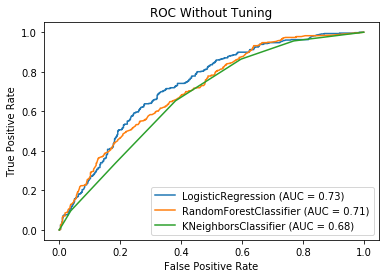

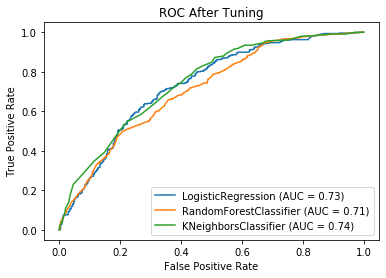

In [138]:
print('Logistic Regression Default\n',classification_report(test_Y2,lr2.predict(test_X2)))
print('Logistic Regression Tuning\n',classification_report(test_Y2,lr2_tune.predict(test_X2)))
print('===========================================================================')
print('\n\nRandom Forest Default\n',classification_report(test_Y2,rf2.predict(test_X2)))
print('\n\nRandom Forest Tuning\n',classification_report(test_Y2,rf2_tune.predict(test_X2)))
print('===========================================================================')
print('\n\nKNN Default\n',classification_report(test_Y2,knn2.predict(test_X2)))
print('\n\nKNN Tuning\n',classification_report(test_Y2,knn2_tune.predict(test_X2)))


## ROC AUC
disp = plot_roc_curve(lr2,test_X2,test_Y2)
plot_roc_curve(rf2,test_X2,test_Y2,ax=disp.ax_)
plot_roc_curve(knn2,test_X2,test_Y2,ax=disp.ax_)
plt.title('ROC Without Tuning')
##ROC AUC
disp = plot_roc_curve(lr2_tune,test_X2,test_Y2)
plot_roc_curve(rf2_tune,test_X2,test_Y2,ax=disp.ax_)
plot_roc_curve(knn2_tune,test_X2,test_Y2,ax=disp.ax_)
plt.title('ROC After Tuning')

# 3. Model 3 (Random Over Sampling)

Dalam dataset ini __class 0__ : 5163, sedangkan __class 1__ : 1869, saya akan menggunakan ```RandomOverSampler``` untuk menyeimbangkan class, teknik ini akan menduplikasi minority class (__class 1__) sehingga total __class 1__ akan sama dengan majority class  (__class 0__)

### Balancing Dataset 

In [107]:
telcom['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

Berbeda dengan Under Sample, saya hanya akan melakukan Over Sample pada data train saja, sehingga data test yang dipakai tidak bias. Untuk itu saya akan melakukan spliting dataset terlebih dahulu

In [108]:
feature    = telcom.drop(columns=['customerID','Churn','MonthlyCharges','TotalCharges'])
target = telcom['Churn']
trainX,test_X3,trainY,test_Y3 = train_test_split(feature,target,test_size = .15,random_state=123)
print(len(trainX),len(test_X3))
trainY.value_counts()

5977 1055


0    4413
1    1564
Name: Churn, dtype: int64

In [109]:
os =  RandomOverSampler(random_state=123)
train_X3,train_Y3=os.fit_sample(trainX,trainY)
print(len(train_X3),len(train_Y3))
train_Y3.value_counts()

8826 8826


1    4413
0    4413
Name: Churn, dtype: int64

### Deklarasi Model

Deklarasi model menggunakan parameter default

In [110]:
### Logistic Regression
lr3 = LogisticRegression()
lr3.fit(train_X3,train_Y3)
## Random Forest
rf3 = RandomForestClassifier()
rf3.fit(train_X3,train_Y3)
## KNN
knn3 = KNeighborsClassifier()
knn3.fit(train_X3,train_Y3)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Hyperparameter Tuning

__Parameter Tuning Logistic Regression__

In [112]:
def tuning(model,parameter,n_cv):
    random = GridSearchCV(model, parameter, cv = n_cv,scoring='f1')
    random.fit(train_X3,train_Y3)
    best_param = random.best_params_
    
    return best_param

In [142]:
# lr3_tune = LogisticRegression()
# param_best = tuning(lr3_tune,param_lr,5)
# param_best

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

In [113]:
lr3_tune = LogisticRegression(solver='newton-cg',penalty='l2',C=1)
lr3_tune.fit(train_X3,train_Y3)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

__Parameter Tuning Random Forest__

In [146]:
# rf3_tune = RandomForestClassifier()
# param_best = tuning(rf3_tune,param_rf,5)
# param_best

{'bootstrap': False, 'criterion': 'gini', 'n_estimators': 10}

In [114]:
rf3_tune = RandomForestClassifier(n_estimators = 10,criterion='gini',bootstrap=False)
rf3_tune.fit(train_X3,train_Y3)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

__Parameter Tuning KNN__

In [148]:
# knn3_tune = KNeighborsClassifier()
# param_best = tuning(knn3_tune,param_knn,5)
# param_best

{'algorithm': 'auto', 'n_neighbors': 50, 'weights': 'distance'}

In [115]:
knn3_tune = KNeighborsClassifier(weights='distance',n_neighbors=50,algorithm='auto')
knn3_tune.fit(train_X3,train_Y3)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='distance')

### Final Evaluation

Logistic Regression Default
               precision    recall  f1-score   support

           0       0.89      0.76      0.82       750
           1       0.57      0.77      0.65       305

    accuracy                           0.76      1055
   macro avg       0.73      0.77      0.74      1055
weighted avg       0.80      0.76      0.77      1055

Logistic Regression Tuning
               precision    recall  f1-score   support

           0       0.89      0.76      0.82       750
           1       0.57      0.77      0.65       305

    accuracy                           0.76      1055
   macro avg       0.73      0.77      0.74      1055
weighted avg       0.80      0.76      0.77      1055



Random Forest Default
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       750
           1       0.61      0.54      0.57       305

    accuracy                           0.77      1055
   macro avg       0.71      0.70      0.71   

Text(0.5, 1.0, 'ROC After Tuning')

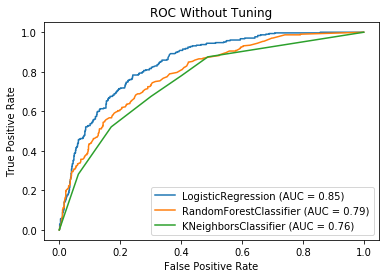

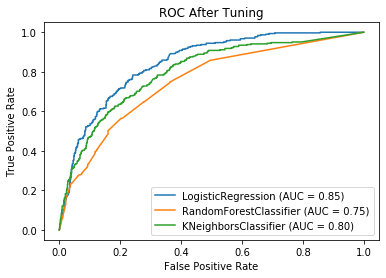

In [140]:
print('Logistic Regression Default\n',classification_report(test_Y3,lr3.predict(test_X3)))
print('Logistic Regression Tuning\n',classification_report(test_Y3,lr3_tune.predict(test_X3)))
print('===============================================================================')
print('\n\nRandom Forest Default\n',classification_report(test_Y3,rf3.predict(test_X3)))
print('\n\nRandom Forest Tuning\n',classification_report(test_Y3,rf3_tune.predict(test_X3)))
print('===============================================================================')
print('\n\nKNN Default\n',classification_report(test_Y3,knn3.predict(test_X3)))
print('\n\nKNN Tuning\n',classification_report(test_Y3,knn3_tune.predict(test_X3)))

## ROC-AUC
disp = plot_roc_curve(lr3,test_X3,test_Y3)
plot_roc_curve(rf3,test_X3,test_Y3,ax=disp.ax_)
plot_roc_curve(knn3,test_X3,test_Y3,ax=disp.ax_)
plt.title('ROC Without Tuning')
## ROC-AUC
disp = plot_roc_curve(lr3_tune,test_X3,test_Y3)
plot_roc_curve(rf3_tune,test_X3,test_Y3,ax=disp.ax_)
plot_roc_curve(knn3_tune,test_X3,test_Y3,ax=disp.ax_)
plt.title('ROC After Tuning')